In [ ]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
from datetime import datetime
import time
import random
from requests.adapters import HTTPAdapter
from requests.packages.urllib3.util.retry import Retry
import matplotlib.pyplot as plt

In [88]:
data = pd.read_csv('amazon.csv')

In [89]:
data.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [ ]:
# Set up a retry session to handle failed requests
session = requests.Session()
retries = Retry(total=2, backoff_factor=1, status_forcelist=[500, 502, 503, 504, 429])
session.mount('https://', HTTPAdapter(max_retries=retries))

def scrape_product_info(url):
    headers = {
        'User-Agent': random.choice([
            'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/132.0.0.0 Safari/537.36',
            'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0 Safari/537.36',
            'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/90.0 Safari/537.36'
        ]),
        'Accept-Language': 'da, en-gb, en',
        'Accept-Encoding': 'gzip, deflate, br',
        'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,*/*;q=0.8',
        'Referer': 'https://www.google.com/'
    }

    try:
        response = session.get(url, headers=headers, timeout=10)
        response.raise_for_status()
    except requests.exceptions.RequestException as e:
        print(f"Request failed for {url}: {e}")
        return {'url': url, 'brand': None, 'release_date': None}

    soup = BeautifulSoup(response.content, 'html.parser')

    # Get brand name
    brand_element = soup.find('span', {'class': 'a-size-base po-break-word'})
    brand = brand_element.text.strip() if brand_element else None

    # Get item release date
    date = None
    table = soup.find('table', {"id": "productDetails_detailBullets_sections1"})
    if table:
        details = soup.find_all('th', {'class': 'a-color-secondary a-size-base prodDetSectionEntry'})
        for detail in details:
            if detail.text.strip() == 'Date First Available':
                date_value = detail.find_parent('tr').find('td', {'class': 'a-size-base prodDetAttrValue'})
                if date_value:
                    date_string = date_value.text.strip()
                    try:
                        date = datetime.strptime(date_string, "%d %B %Y")
                    except ValueError:
                        print(f"Date parsing failed for {url}: {date_string}")
                break

    # Randomized delay to avoid detection
    time.sleep(random.uniform(1, 3))

    return {'url': url, 'brand': brand, 'release_date': date}


In [95]:
product_info = []
for i in range(len(data)):
    url = data.iloc[i]['product_link']
    info = scrape_product_info(url)
    product_info.append(info)
    time.sleep(1)

Request failed for https://www.amazon.in/FLiX-Beetel-Durable-Lightning-Charge/dp/B08P9RYPLR/ref=sr_1_216?qid=1672909134&s=electronics&sr=1-216: 404 Client Error: Not Found for url: https://www.amazon.in/FLiX-Beetel-Durable-Lightning-Charge/dp/B08P9RYPLR/ref=sr_1_216?qid=1672909134&s=electronics&sr=1-216
Request failed for https://www.amazon.in/Kodak-inches-55CA0909-Digital-Surround/dp/B08XXF5V6G/ref=sr_1_462?qid=1672909147&s=electronics&sr=1-462: 404 Client Error: Not Found for url: https://www.amazon.in/Kodak-inches-55CA0909-Digital-Surround/dp/B08XXF5V6G/ref=sr_1_462?qid=1672909147&s=electronics&sr=1-462
Request failed for https://www.amazon.in/Smashtronics%C2%AE-Silicone-Firestick-Control-Shockproof/dp/B09HK9JH4F/ref=sr_1_463?qid=1672909147&s=electronics&sr=1-463: 404 Client Error: Not Found for url: https://www.amazon.in/Smashtronics%C2%AE-Silicone-Firestick-Control-Shockproof/dp/B09HK9JH4F/ref=sr_1_463?qid=1672909147&s=electronics&sr=1-463
Request failed for https://www.amazon.in/

In [97]:
len(product_info)

1465

In [98]:
products_df = pd.DataFrame(product_info)

In [99]:
products_df

,url,brand,release_date
0,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,Wayona,2018-10-15
1,https://www.amazon.in/Ambrane-Unbreakable-Char...,Ambrane,2021-07-05
2,https://www.amazon.in/Sounce-iPhone-Charging-C...,Sounce,2021-02-24
3,https://www.amazon.in/Deuce-300-Resistant-Tang...,boAt,2020-09-03
4,https://www.amazon.in/Portronics-Konnect-POR-1...,Portronics,2020-07-08
...,...,...,...
1460,https://www.amazon.in/Noir-Aqua-Spanner-Purifi...,Polypropylene,2020-10-09
1461,https://www.amazon.in/Prestige-Delight-PRWO-1-...,Prestige,NaT
1462,https://www.amazon.in/Bajaj-RX-10-2000-Watt-Co...,Bajaj,2012-10-11
1463,https://www.amazon.in/Havells-Ventilair-230mm-...,Havells,NaT


In [125]:
sum(products_df['brand'].isna())

743

In [127]:
sum(products_df['release_date'].isna())

969

In [104]:
products_df['brand'].value_counts()

brand
amazon basics                 39
boAt                          30
32 Inches                     28
Wayona                        20
Ambrane                       19
                              ..
30L x 20W x 7H Centimeters     1
VAPJA                          1
ZIGMA WinoteK                  1
Steel cup and spoon            1
Polypropylene                  1
Name: count, Length: 259, dtype: int64

In [106]:
len(products_df['brand'].unique())

260

<Axes: xlabel='release_date'>

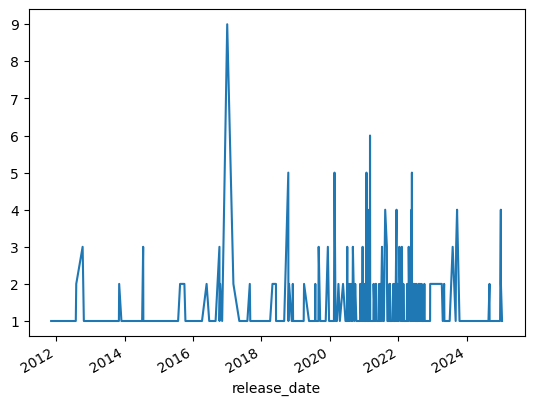

In [121]:
products_df['release_date'].value_counts().sort_index().plot()

In [103]:
products_df.to_csv('products.csv')